In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from datetime import date
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
plt.style.use('ggplot') #gglot style
import seaborn as sns #Enhanced plot library


from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

#### EXPLORATORY DATA ANALYSIS AND DATA WRANGLING

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-26,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
1,2020-11-25,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983
2,2020-11-24,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,6.713675
3,2020-11-23,23,11,2020,252,8,Afghanistan,AF,AFG,38041757.0,Asia,6.655844
4,2020-11-22,22,11,2020,154,12,Afghanistan,AF,AFG,38041757.0,Asia,6.203709


In [4]:
df.shape

(58066, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58066 entries, 0 to 58065
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     58066 non-null  datetime64[ns]
 1   day                                                         58066 non-null  int64         
 2   month                                                       58066 non-null  int64         
 3   year                                                        58066 non-null  int64         
 4   cases                                                       58066 non-null  int64         
 5   deaths                                                      58066 non-null  int64         
 6   countriesAndTerritories                                     58066 non-null  object        
 7   geoId                 

In [6]:
num = df['cases']._get_numeric_data()

In [7]:
num[num < 0] = 0

In [8]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [9]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

In [10]:
Stat_Data=df[['cases','countriesAndTerritories']]

Country Name: South_Korea
            cases
count  332.000000
mean    97.343373
std    127.341642
min      0.000000
25%     17.750000
50%     54.000000
75%    118.250000
max    909.000000
[[<Axes: title={'center': 'cases'}>]]


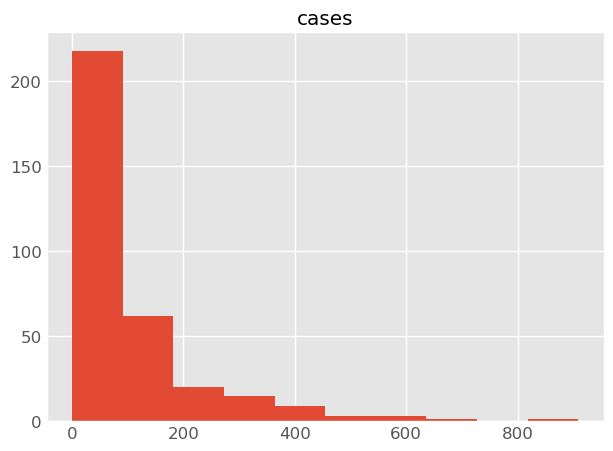

In [14]:
Country = input('Country Name: ')

def basicstat(Country):
        
        basic_stat_c= Stat_Data[Stat_Data['countriesAndTerritories'] == Country].describe()
        
        basic_hist_c= Stat_Data[Stat_Data['countriesAndTerritories'] == Country].hist()
        print(basic_stat_c)
        
        print(basic_hist_c)
        
        return
    
basicstat(Country)
        

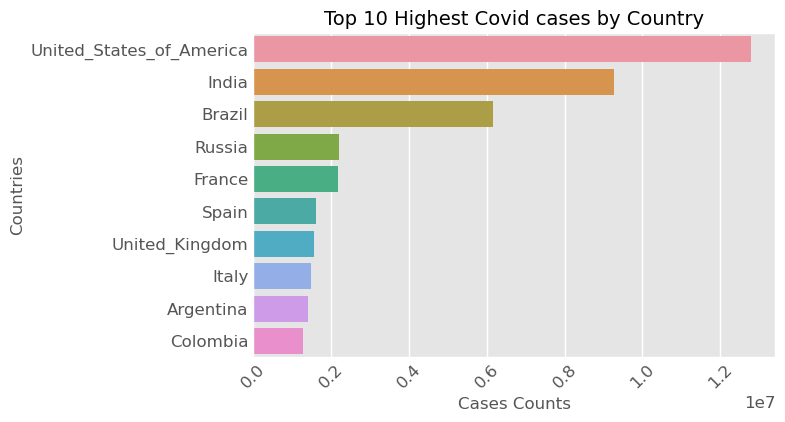

In [20]:
df_cc =df.groupby('countriesAndTerritories', as_index=False)['cases'].sum()
df_cc2= df_cc.nlargest(10, 'cases')

#Show bar Chart
plt.figure(figsize=(6,4))
sns.barplot(data=df_cc2, x='cases', y='countriesAndTerritories')
plt.title('Top 10 Highest Covid cases by Country', fontsize=14)
plt.xlabel('Cases Counts', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Integrating the weather data

In [22]:
wdd=pd.read_csv('weather.csv')

In [23]:
wdd.head()

,date,location_key,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01,AD,4.236111,0.138889,8.208333,3.302000,NaN,-0.972222,72.773049
1,2020-01-02,AD,3.875000,-0.722222,10.055556,6.688667,NaN,-1.625000,70.841314
2,2020-01-03,AD,4.763889,0.597222,8.402778,5.016500,NaN,-0.611111,71.117248
3,2020-01-04,AD,4.555556,1.125000,8.708333,3.810000,NaN,0.722222,77.338640
4,2020-01-05,AD,4.763889,-1.000000,11.361111,2.476500,NaN,-3.361111,60.762380


In [24]:
wdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21680590 entries, 0 to 21680589
Data columns (total 9 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   date                         object 
 1   location_key                 object 
 2   average_temperature_celsius  float64
 3   minimum_temperature_celsius  float64
 4   maximum_temperature_celsius  float64
 5   rainfall_mm                  float64
 6   snowfall_mm                  float64
 7   dew_point                    float64
 8   relative_humidity            float64
dtypes: float64(7), object(2)
memory usage: 1.5+ GB


In [ ]:
df.rename(columns={"geoId": "location_key"}, inplace=True)

In [ ]:
df.rename(columns={"dateRep": "date"}, inplace=True)

In [ ]:
import datetime as dt

In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
wdd["date"]=pd.to_datetime(wdd["date"])

In [ ]:
df["date"].min(), df["date"].max()

In [ ]:
wdd["date"].min(), wdd["date"].max()

In [ ]:
#Extract weather data for '2020-01-01' to '2020-11-26'
wds = pd.DataFrame(wdd)
start_date = '2020-01-01'
end_date = '2020-11-26'
mask = (wds['date'] > start_date) & (wds['date'] <= end_date)
  
wds=wdd.loc[mask]

In [ ]:
wds.head()

In [ ]:
# Renaming data in the "Location_key column" column
new_name = {
    "GB": "UK",
}

wds["location_key"] = wds["location_key"].replace(new_name)

In [ ]:
wds.shape

In [ ]:
# Merging the 'covid_19 data' with 'weather data' 
merged_data = pd.merge(df, wds, on=["location_key","date"], how='left')

In [ ]:
merged_data.shape

In [ ]:
merged_data.head()

In [ ]:
merged_data.location_key.nunique()

In [ ]:
merged_data.columns

In [ ]:
merged_data.info()

In [ ]:
#Converting Quantity into float(useful for ML modelling later on)
merged_data['cases']=merged_data['cases'].astype(float)


In [ ]:
merged_data['deaths']=merged_data['deaths'].astype(float)

In [ ]:
merged_data.head()

### Finding Correlation between data features

In [ ]:
corrdata = merged_data[["location_key","countriesAndTerritories","cases","average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","rainfall_mm","snowfall_mm","dew_point","relative_humidity"]]

In [ ]:
corrdata

In [ ]:
merged_data.countriesAndTerritories.unique()

In [ ]:
Country = input('Country Name: ')

def corr_(Country):
    
        corrby_c = corrdata[corrdata['countriesAndTerritories'] == Country].corr("pearson")      
        sns.heatmap(corrby_c,
           cmap = "rocket",
           linewidths = 2,
           linecolor = "black",
           annot = True)
        return
    
corr_(Country)

In [ ]:
# Save DataFrame to a CSV file
#merged_data.to_csv('mergeddata.csv', index=False)  # Set index=False to exclude the index column